In [1]:
from _tests import scripts
from scripts.notebook_utils import *

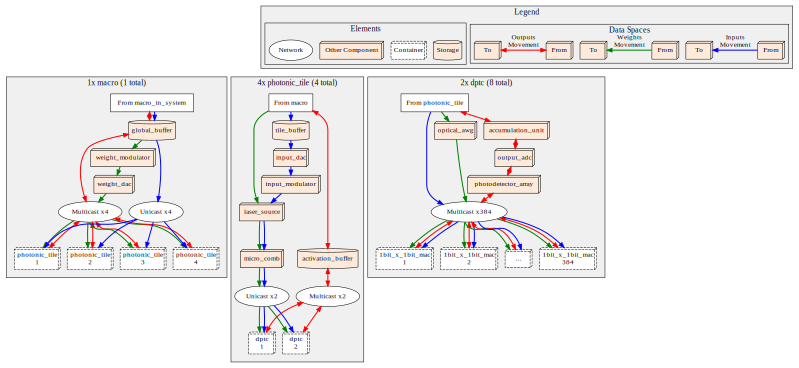

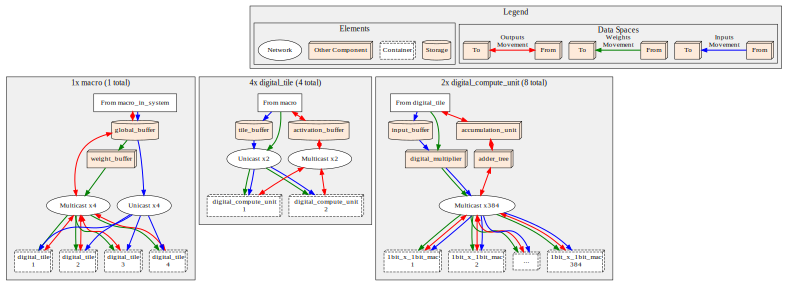

In [60]:
os.rename("arch_photonic.yaml", "arch.yaml")
display_diagram(get_diagram("lightening_ieee_2024", ignore=DIAGRAM_DEFAULT_IGNORE))
os.rename("arch.yaml", "arch_photonic.yaml")
os.rename("arch_digital.yaml", "arch.yaml")
display_diagram(get_diagram("lightening_ieee_2024", ignore=DIAGRAM_DEFAULT_IGNORE))
os.rename("arch.yaml", "arch_digital.yaml")

In [23]:
import matplotlib.pyplot as plt

comp_map_area = {
    "global_buffer": "Mem",
    "weight_modulator": "MZM",
    "input_modulator": "MZM",
    "weight_dac": "DAC",
    "input_dac": "DAC",
    "laser_source": "Laser&Comb",
    "micro_comb": "Laser&Comb",
    "output_adc": "ADC",
    "tile_buffer": "Core",
    "activation_buffer": "Core",
    "optical_awg": "Core",
    "accumulation_unit": "Core",
    "photodetector_array": "Core",
    "weight_buffer": "Mem",
    "input_buffer": "Core",
    "digital_multiplier": "Digital-exclusive",
    "adder_tree": "Digital-exclusive"
}

comp_map_energy = {
    "global_buffer": "Mem",
    "weight_modulator": "MZM",
    "input_modulator": "MZM",
    "weight_dac": "DAC",
    "input_dac": "DAC",
    "laser_source": "Laser",
    "micro_comb": "Other",
    "output_adc": "ADC",
    "tile_buffer": "Core",
    "activation_buffer": "Core",
    "optical_awg": "Core",
    "accumulation_unit": "Core",
    "photodetector_array": "Photodetector",
    "weight_buffer": "Mem",
    "input_buffer": "Core",
    "digital_multiplier": "Digital-exclusive",
    "adder_tree": "Digital-exclusive"
}

def get_info():
    spec = get_spec("lightening_ieee_2024")
    spec.variables["MAX_UTILIZATION"] = True
    results = run_mapper(spec, "my_spec")
    
    print(dir(results))
    for attr in dir(results):
        if not attr.startswith("_"):
            try:
                print(f"{attr}: {getattr(results, attr)}")
            except Exception:
                pass    

def get_area_energy():
    spec = get_spec("lightening_ieee_2024")
    spec.variables["MAX_UTILIZATION"] = True
    results = run_mapper(spec, "my_spec")

    areas = {"Mem":0, "Core":0,"Laser&Comb":0,"MZM":0,"ADC":0,"DAC":0,"Digital-exclusive":0}
    energies = {"Mem":0, "Core":0,"Laser":0,"MZM":0,"ADC":0,"DAC":0,"Other":0,"Photodetector":0,"Digital-exclusive":0}

    for k, v in results.per_component_area.items():
        if v > 0 and k in comp_map_area:
            areas[comp_map_area[k]] += v * 1e6  # mm²

    for k, v in results.per_component_energy.items():
        if v > 0 and k in comp_map_energy:
            energies[comp_map_energy[k]] += v * 1e12  # pJ

    return areas, energies

def plot_pie(data_dict, title, unit):
    labels = []
    sizes = []
    total_value = sum(data_dict.values())
    for k, v in sorted(data_dict.items(), key=lambda x: -x[1]):
        if v < 1e-3:
            continue
        labels.append(f"{k} ({v:.2f} {unit})")
        sizes.append(v)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')
    plt.title(f"{title}\nTotal: {total_value:.2f} {unit}")
    plt.tight_layout()
    plt.show()

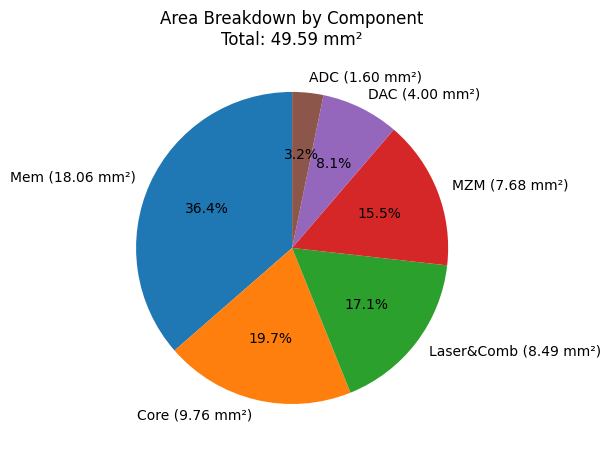

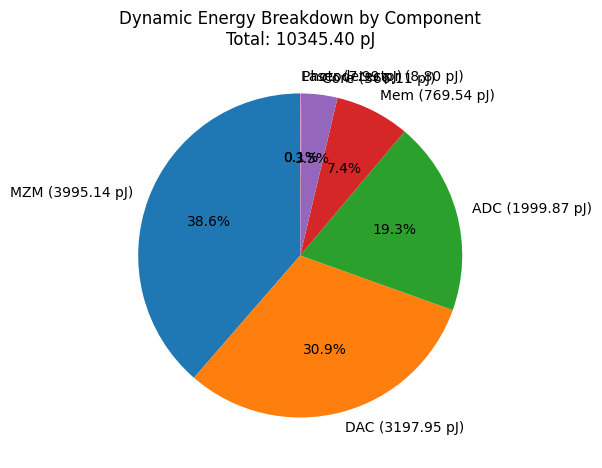

In [19]:
# get_info()
os.rename("arch_photonic.yaml", "arch.yaml")
areas_main, energies_main = get_area_energy()
plot_pie(areas_main, "Area Breakdown by Component", "mm²")
plot_pie(energies_main, "Dynamic Energy Breakdown by Component", "pJ")
os.rename("arch.yaml", "arch_photonic.yaml")

In [42]:
!/usr/local/bin/accelergy -l

2025-05-06 22:37:00 INFO            _                _                      
2025-05-06 22:37:00 INFO           / \   ___ ___ ___| | ___ _ __ __ _ _   _ 
2025-05-06 22:37:00 INFO          / _ \ / __/ __/ _ \ |/ _ \ '__/ _` | | | |
2025-05-06 22:37:00 INFO         / ___ \ (_| (_|  __/ |  __/ | | (_| | |_| |
2025-05-06 22:37:00 INFO        /_/   \_\___\___\___|_|\___|_|  \__, |\__, |
2025-05-06 22:37:00 INFO                                        |___/ |___/ 
2025-05-06 22:37:00 INFO        generating outputs according to the following specified output flags... 
2025-05-06 22:37:00 INFO         Please use the -f flag to update the preference (default to all output files)
2025-05-06 22:37:00 INFO        {'ERT': 1, 'ERT_summary': 1, 'ART': 1, 'ART_summary': 1, 'energy_estimation': 1, 'flattened_arch': 1}
2025-05-06 22:37:00 INFO        Located config file at /home/workspace/.config/accelergy/accelergy_config.yaml.
2025-05-06 22:37:00 INFO        config file located:
2025-05-06 22:37:00 INF

In [21]:
print("### digital ###")

### digital ###


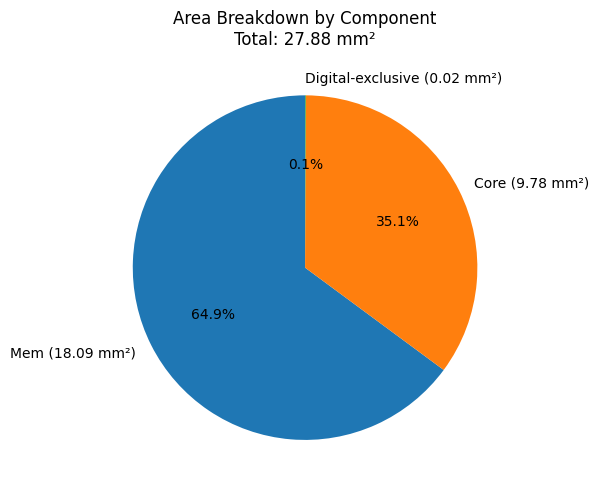

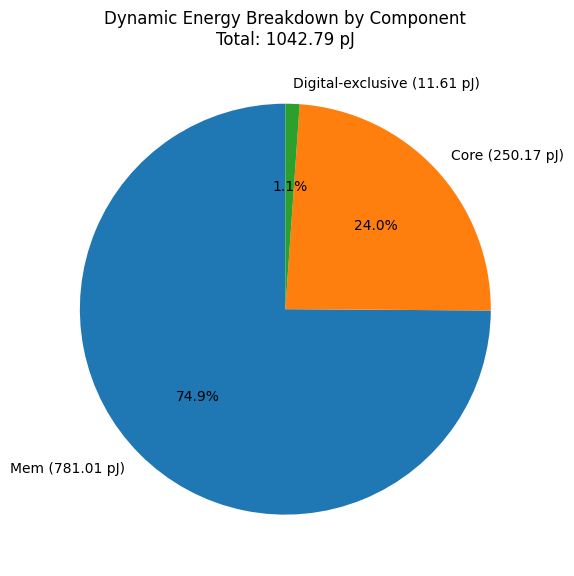

In [61]:
# print(get_area_energy())
os.rename("arch_digital.yaml", "arch.yaml")
areas_dig, energies_dig = get_area_energy()
plot_pie(areas_dig, "Area Breakdown by Component", "mm²")
plot_pie(energies_dig, "Dynamic Energy Breakdown by Component", "pJ")
os.rename("arch.yaml", "arch_digital.yaml")

In [52]:
!/usr/local/bin/accelergy /home/workspace/outputs/1411.281473189127200/parsed-processed-input.yaml --oprefix timeloop-mapper

2025-05-06 22:50:17 INFO            _                _                      
2025-05-06 22:50:17 INFO           / \   ___ ___ ___| | ___ _ __ __ _ _   _ 
2025-05-06 22:50:17 INFO          / _ \ / __/ __/ _ \ |/ _ \ '__/ _` | | | |
2025-05-06 22:50:17 INFO         / ___ \ (_| (_|  __/ |  __/ | | (_| | |_| |
2025-05-06 22:50:17 INFO        /_/   \_\___\___\___|_|\___|_|  \__, |\__, |
2025-05-06 22:50:17 INFO                                        |___/ |___/ 
2025-05-06 22:50:17 INFO        generating outputs according to the following specified output flags... 
2025-05-06 22:50:17 INFO         Please use the -f flag to update the preference (default to all output files)
2025-05-06 22:50:17 INFO        {'ERT': 1, 'ERT_summary': 1, 'ART': 1, 'ART_summary': 1, 'energy_estimation': 1, 'flattened_arch': 1}
2025-05-06 22:50:17 INFO        Located config file at /home/workspace/.config/accelergy/accelergy_config.yaml.
2025-05-06 22:50:17 INFO        config file located:
2025-05-06 22:50:17 INF

In [26]:
print("## disable operand sharing ##")

## disable operand sharing ##


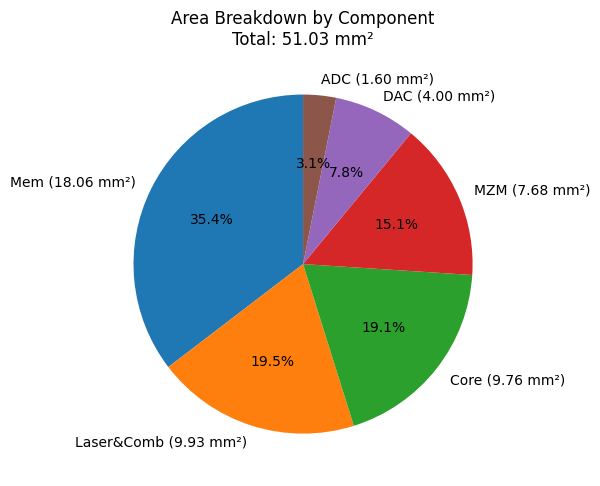

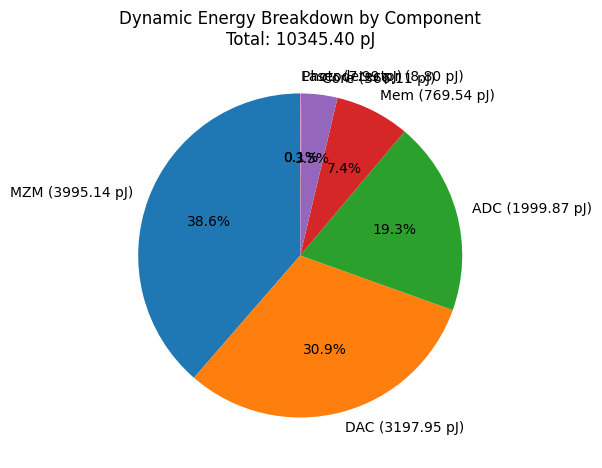

In [27]:
# get_info()
os.rename("arch_disable_operand_sharing.yaml", "arch.yaml")
areas_op, energies_op = get_area_energy()
plot_pie(areas_op, "Area Breakdown by Component", "mm²")
plot_pie(energies_op, "Dynamic Energy Breakdown by Component", "pJ")
os.rename("arch.yaml", "arch_disable_operand_sharing.yaml")

In [28]:
print("## disable analog accumulation ##")

## disable analog accumulation ##


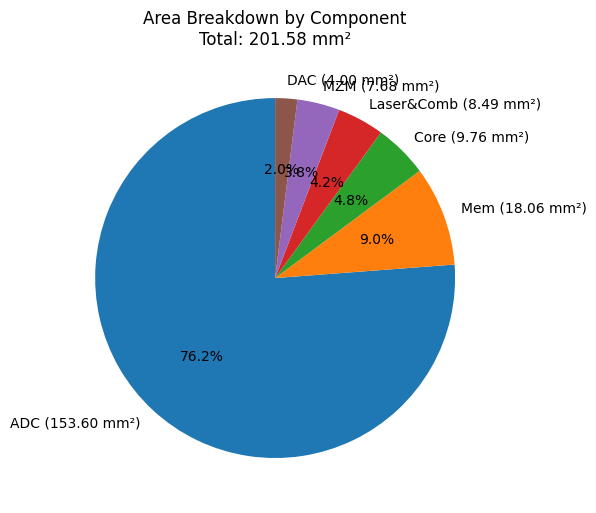

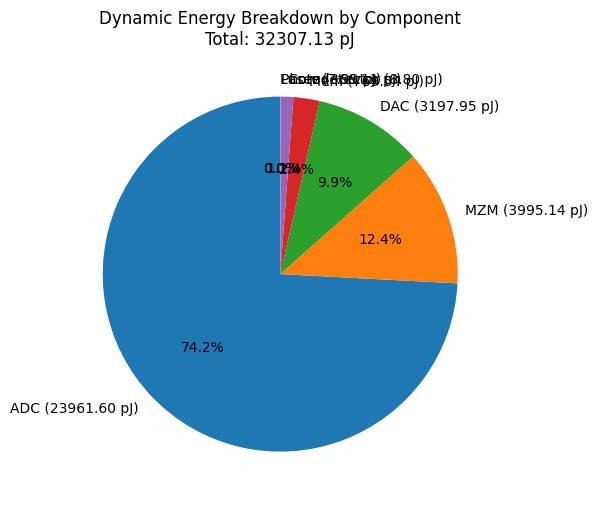

In [29]:
# get_info()
os.rename("arch_disable_analog_accumulation.yaml", "arch.yaml")
areas_acm, energies_acm = get_area_energy()
plot_pie(areas_acm, "Area Breakdown by Component", "mm²")
plot_pie(energies_acm, "Dynamic Energy Breakdown by Component", "pJ")
os.rename("arch.yaml", "arch_disable_analog_accumulation.yaml")

In [62]:
print("### general ###")

### general ###


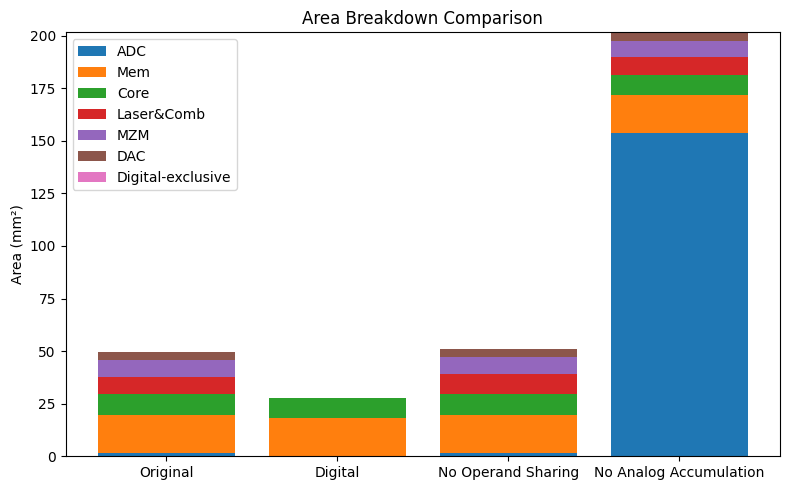

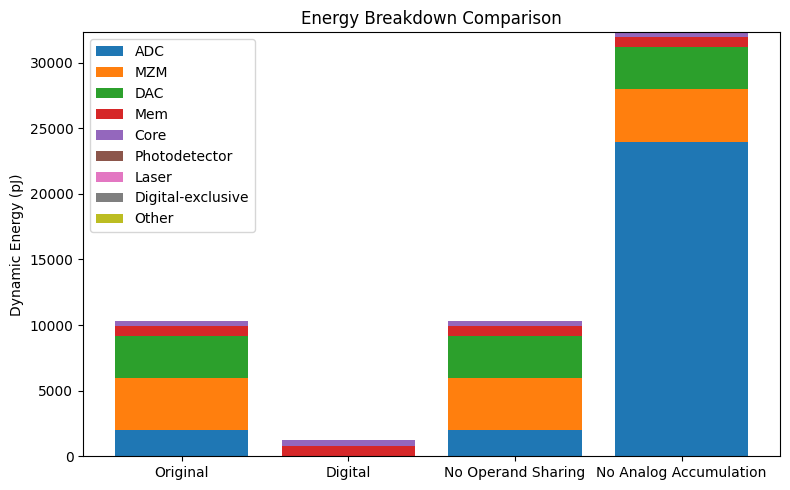

In [34]:
from pathlib import Path
import yaml
import matplotlib.pyplot as plt

def plot_stacked_bar(results_dict, title, ylabel, unit):
    labels = list(results_dict.keys())
    keys = sorted(next(iter(results_dict.values())).keys(), key=lambda k: -sum(r[k] for r in results_dict.values()))

    data = {k: [results_dict[arch].get(k, 0) for arch in labels] for k in keys}

    bottom = [0] * len(labels)
    plt.figure(figsize=(8, 5))
    for k in keys:
        plt.bar(labels, data[k], bottom=bottom, label=k)
        bottom = [bottom[i] + data[k][i] for i in range(len(labels))]

    plt.ylabel(f"{ylabel} ({unit})")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

area_results = {
    "Original": areas_main,
    "Digital": areas_dig,
    "No Operand Sharing": areas_op,
    "No Analog Accumulation": areas_acm
}

energy_results = {
    "Original": energies_main,
    "Digital": energies_dig,
    "No Operand Sharing": energies_op,
    "No Analog Accumulation": energies_acm
}


plot_stacked_bar(area_results, "Area Breakdown Comparison", "Area", "mm²")
plot_stacked_bar(energy_results, "Energy Breakdown Comparison", "Dynamic Energy", "pJ")


In [126]:
os.rename("arch_photonic.yaml", "arch.yaml")
results = {}
for model in ["vision_transformer", "gpt2_medium", "mobilebert"]:
    results[model] = run_test(
        "lightening_ieee_2024", "test_transformer", dnn_name=model, prf=8, show_doc=False
    )

100%|██████████| 16/16 [01:41<00:00,  6.35s/it]


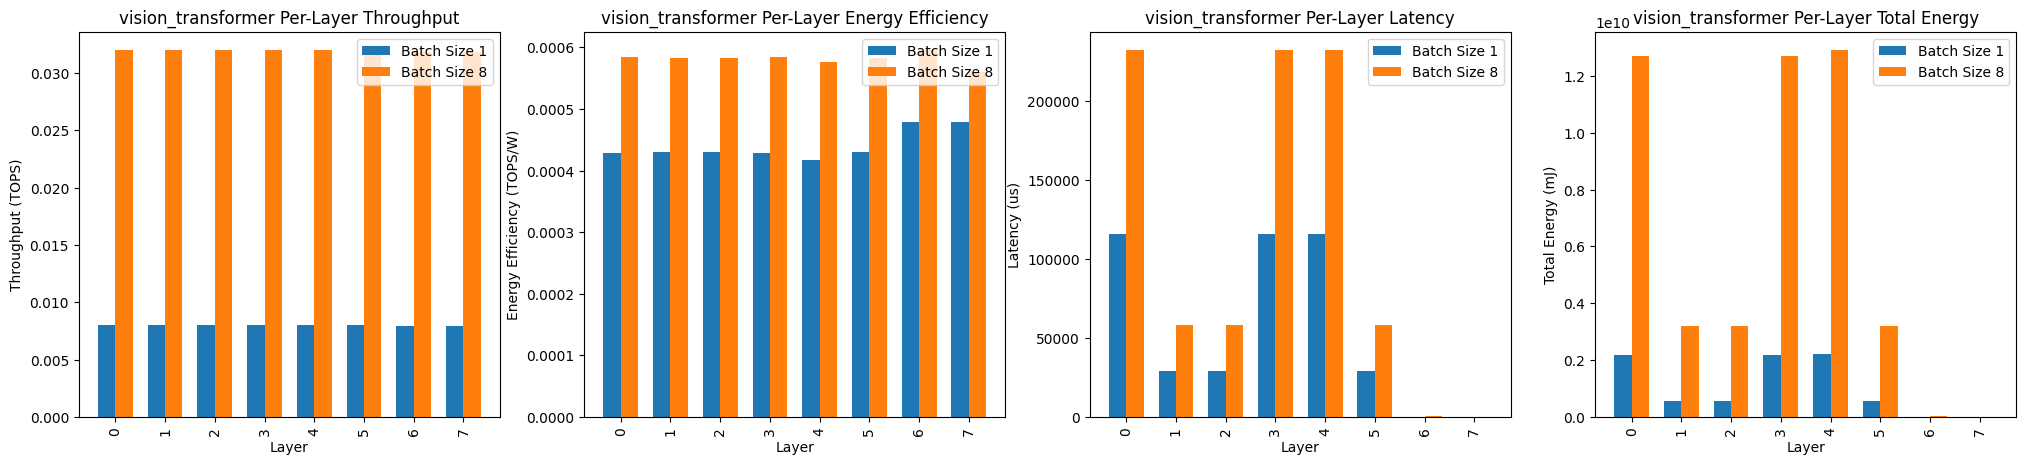

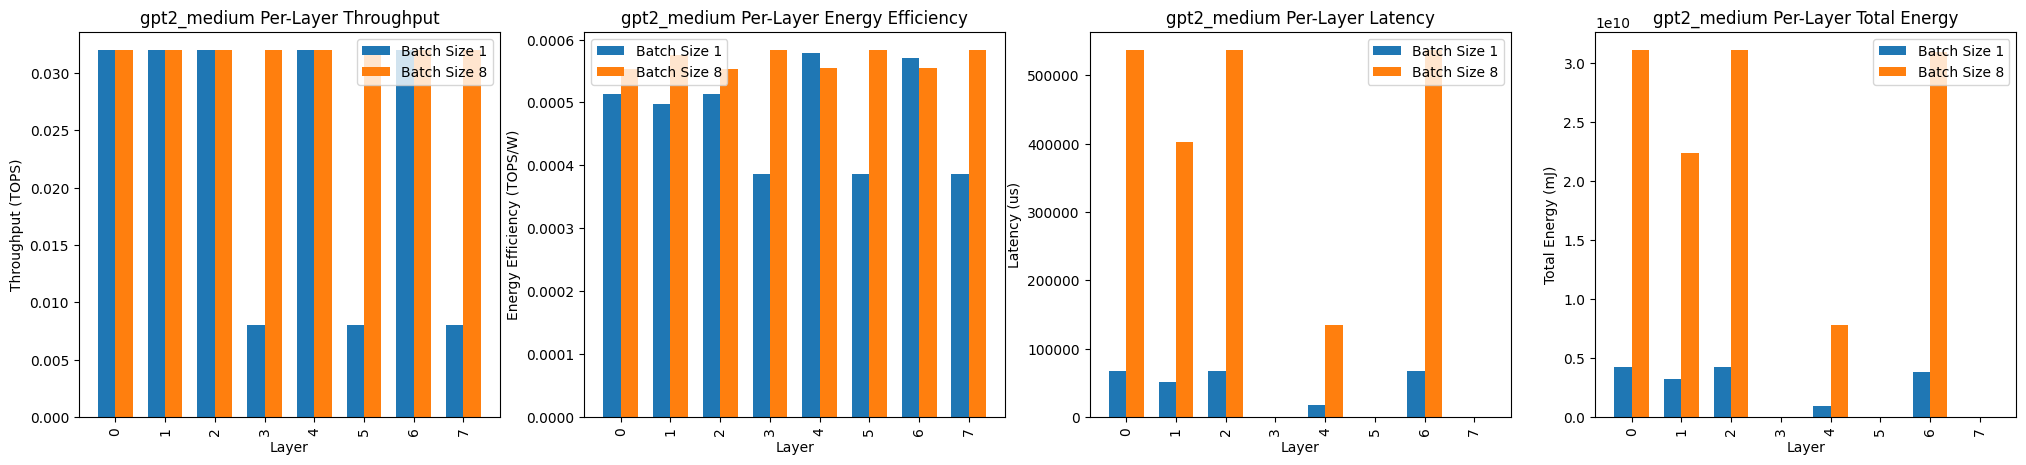

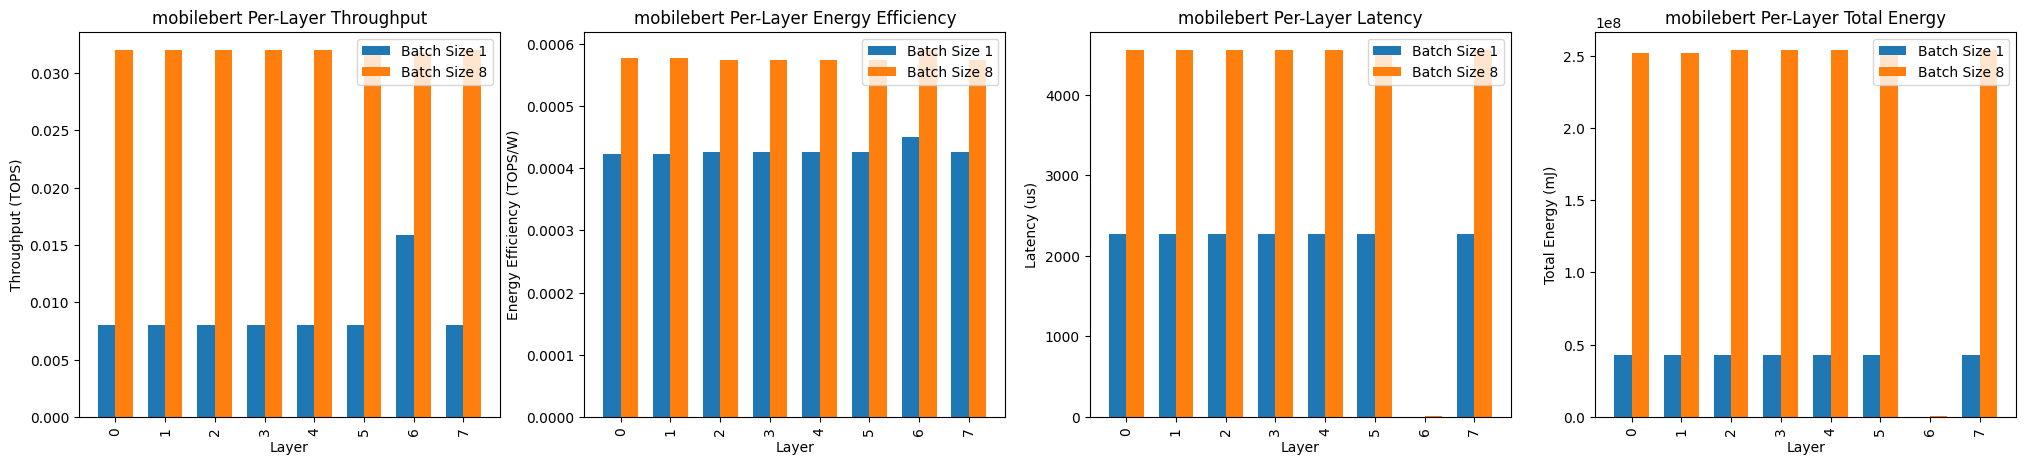

In [127]:
from collections import defaultdict

tops = {}
tops_per_w = {}

for model, result_list in results.items():
    tops[model], tops_per_w[model] = {}, {}

    batch_groups = defaultdict(list)
    for r in result_list:
        batch_size = r.variables["BATCH_SIZE"]
        batch_groups[batch_size].append(r)

    for batch_size, group in batch_groups.items():
        avg_tops = sum(r.tops for r in group) / len(group)
        avg_tops_per_w = sum(r.tops_per_w for r in group) / len(group)

        label = f"Batch Size {batch_size}"
        tops[model][label] = avg_tops
        tops_per_w[model][label] = avg_tops_per_w

for model, result in results.items():
    fig, ax = plt.subplots(1, 4, figsize=(25, 5))
    for ax, attrname, title, ylabel, scaleby in [
        (ax[0], "tops", "Throughput", "TOPS", 1),
        (ax[1], "tops_per_w", "Energy Efficiency", "TOPS/W", 1),
        (ax[2], "latency", "Latency", "us", 1e6),
        (ax[3], "energy", "Total Energy", "mJ", 1e9),
    ]:
        per_layer_results = {}
        for j, same_layers in enumerate(zip(*result.split_by("BATCH_SIZE"))):
            per_layer_results[j] = {
                f'Batch Size {r.variables["BATCH_SIZE"]}': getattr(r, attrname) * scaleby
                for r in same_layers
            }
        bar_side_by_side(
            per_layer_results,
            xlabel="Layer",
            ylabel=f"{title} ({ylabel})",
            title=f"{model} Per-Layer {title}",
            ax=ax,
        )

os.rename("arch.yaml", "arch_photonic.yaml")

100%|██████████| 32/32 [02:43<00:00,  5.12s/it]


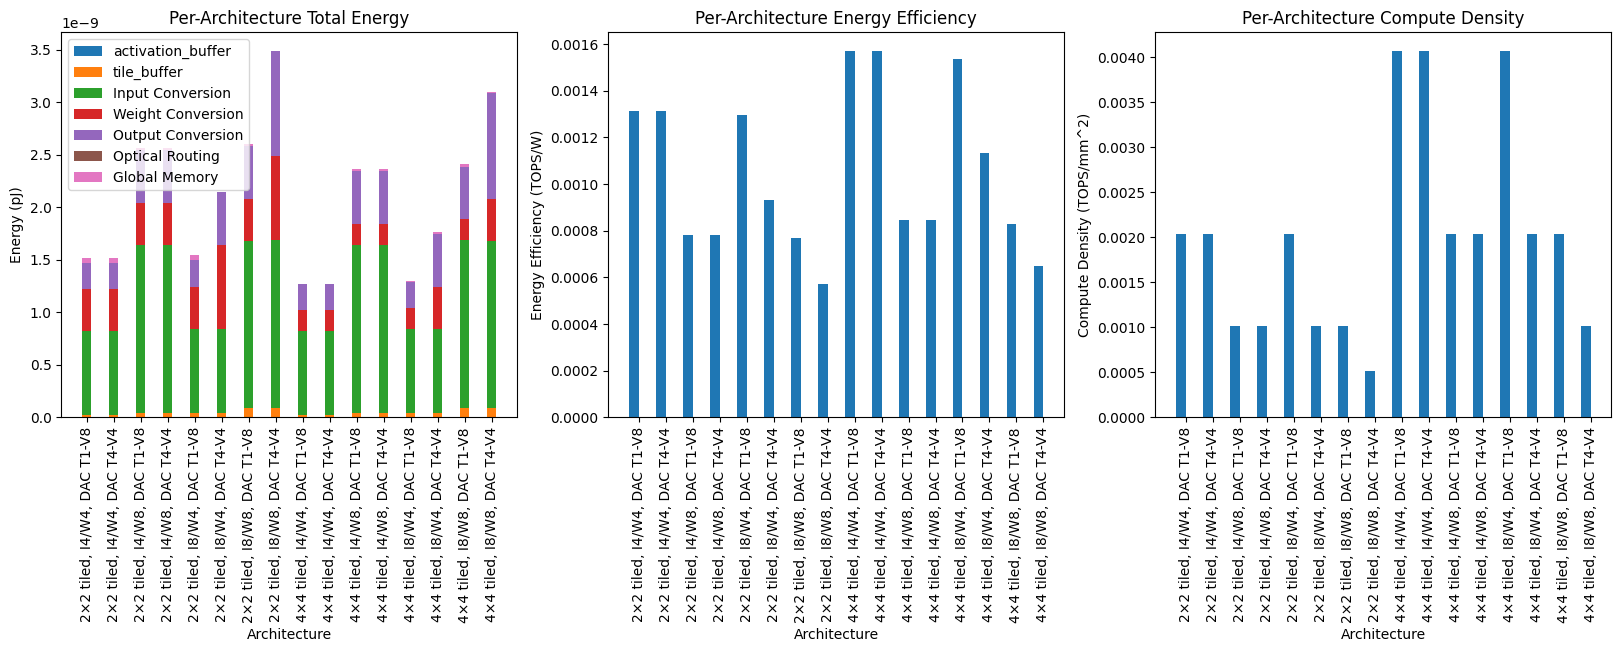

In [128]:
os.rename("arch_photonic.yaml", "arch.yaml")
results = run_test(
    "lightening_ieee_2024", "test_explore_architectures", model_name="mobilebert", prf=2, show_doc=False
)
organized = {}
for r in results:
    key = []

    if r.variables["N_TILES"] == 2:
        key.append("2×2 tiled")
    else:
        key.append("4×4 tiled")

    key.append(f'I{r.variables["ENCODED_INPUT_BITS"]}/W{r.variables["ENCODED_WEIGHT_BITS"]}')

    dac_config = f'T{r.variables["TEMPORAL_DAC_RESOLUTION"]}-V{r.variables["VOLTAGE_DAC_RESOLUTION"]}'
    key.append(f'DAC {dac_config}')

    key = ", ".join(key)
    organized[key] = r

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

bar_stacked(
    {k: v.per_compute("per_component_energy") for k, v in organized.items()},
    xlabel="Architecture",
    ylabel="Energy (pJ)",
    title="Per-Architecture Total Energy",
    ax=axs[0],
)

for ax, attrname, title, ylabel in [
    (axs[1], "tops_per_w", "Energy Efficiency", "TOPS/W"),
    (axs[2], "tops_per_mm2", "Compute Density", "TOPS/mm^2"),
]:
    data = {k: {"": getattr(v, attrname)} for k, v in organized.items()}
    bar_side_by_side(
        data,
        xlabel="Architecture",
        ylabel=f"{title} ({ylabel})",
        title=f"Per-Architecture {title}",
        ax=ax,
    )
os.rename("arch.yaml", "arch_photonic.yaml")

In [125]:
os.rename("arch.yaml", "arch_photonic.yaml")